### Question 1 - Extracting Tesla Stock Data Using yfinance.
In this first section we use Yahoo Finance API in order to extract stock data for Tesla using python library *yfinance*.

In [14]:
# We install the yfinance library in order to use the API.
# !pip install yfinance

# We import the libraries we need.
import yfinance as yf
import pandas as pd

# We call Yahoo Finance API to get Tesla stock data.
tesla = yf.Ticker("TSLA")

# We get the historical prices for this stock. We set the period equal to max to get all data available.
stock_tesla = tesla.history(period="max")

# Reseting the index and showing the first 5 rows of the dataframe.
stock_tesla.reset_index(inplace=True)
stock_tesla.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2 - Extracting Tesla Revenue Data Using Webscraping.
In this second section we extract Tesla revenue through webscraping using BeautifulSoup and requests libraries.

In [22]:
# Importing necessary libraries to webscraping.
import requests
from bs4 import BeautifulSoup
import pandas as pd

# We get the data from the website.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url)

# We parse the data from the web with BeautifulSoupl.
soup = BeautifulSoup(html_data.text, 'html.parser')

# We find the table of quarterly revenues in the website, we read the html and store the data in a dataframe.
table = soup.find_all('table')[1]
tesla_df = pd.read_html(str(table))[0]

# We change the column names to date and revenue.
tesla_df.columns = ['date', 'revenue']

# We show the first 5 rows of the dataframe.
tesla_df.tail()

,date,revenue
49,2010-06-30,$28
50,2010-03-31,$21
51,2009-12-31,NaN
52,2009-09-30,$46
53,2009-06-30,$27


### Question 3 - Extracting GameStop Stock Data Using yfinance.
In this third section we use Yahoo Finance API in order to extract stock data for GameStop using python library *yfinance*.

In [23]:
# We have already installed the yfinance library so no need to do it again.
# We call Yahoo Finance API to get Tesla stock data.
gmstop = yf.Ticker("GME")

# We get the historical prices for this stock. We set the period equal to max to get all data available.
stock_gmstop = gmstop.history(period="max")

# Reseting the index and showing the first 5 rows of the dataframe.
stock_gmstop.reset_index(inplace=True)
stock_gmstop.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5249,2022-12-19 00:00:00-05:00,20.549999,20.889999,19.590000,19.920000,3700600,0.0,0.0
5250,2022-12-20 00:00:00-05:00,19.860001,21.320000,19.620001,20.260000,4479000,0.0,0.0
5251,2022-12-21 00:00:00-05:00,20.400000,20.900000,20.180000,20.559999,2793600,0.0,0.0
5252,2022-12-22 00:00:00-05:00,20.500000,20.500000,18.500000,19.809999,5343100,0.0,0.0
5253,2022-12-23 00:00:00-05:00,20.000000,20.629999,19.650000,20.080000,3172000,0.0,0.0


### Question 4 - Extracting GameStop Revenue Data Using Webscraping.
In this second section we extract GameStop revenue through webscraping using BeautifulSoup and requests libraries.

In [17]:
# We have already installed the libraries before so no need to do it again.
# We get the data from the website.
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url)

# We parse the data from the web with BeautifulSoupl.
soup = BeautifulSoup(html_data.text, 'html.parser')

# We find the table of quarterly revenues in the website, we read the html and store the data in a dataframe.
table = soup.find_all('table')[1]
gmstop_df = pd.read_html(str(table))[0]

# We change the column names to date and revenue.
gmstop_df.columns = ['date', 'revenue']

# We show the first 5 rows of the dataframe.
gmstop_df.head()

,date,revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


### Question 5 - Tesla Stock and Revenue Dashboard.
In this section, we will plot Tesla stocks and revenues over time. There are several ways to plot the data in python. One of the simplests is the following.

<AxesSubplot:xlabel='Date'>

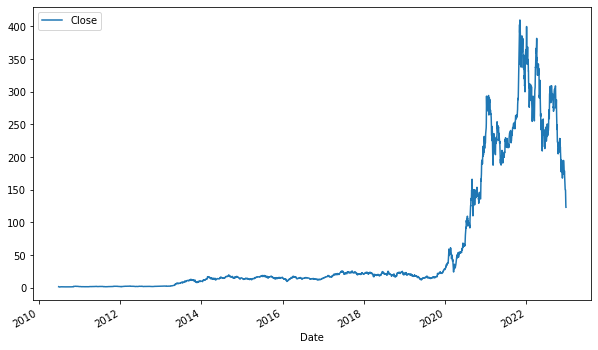

In [18]:
# We plot the column 'Close' of the dataframe stock_tesla in  terms of the column 'Date'.
stock_tesla.plot(x='Date', y='Close', kind='line', figsize=(10, 6))

/var/folders/ym/n_qjv09s6t16h_rs33mqx4m00000gn/T/ipykernel_1692/3727752295.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tesla_df['revenue'] = tesla_df['revenue'].str.replace('$', '').str.replace(',', '.').astype(float)


<AxesSubplot:xlabel='date'>

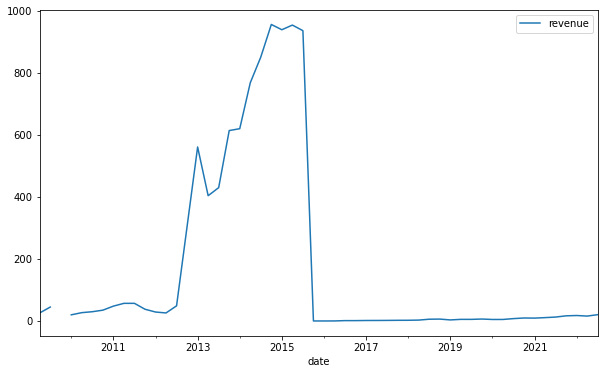

In [19]:
# Change the format of the column 'date' to datetime.
tesla_df['date'] = pd.to_datetime(tesla_df['date'])

# Change the format of the column 'revenue' to float.
tesla_df['revenue'] = tesla_df['revenue'].str.replace('$', '').str.replace(',', '.').astype(float)

# We plot the column 'Close' of the dataframe stock_tesla in  terms of the column 'Date'.
tesla_df.plot(x='date', y='revenue', kind='line', figsize=(10, 6))

### Question 6 - GameStop Stock and Revenue Dashboard.
In this section, we will plot GameStop stocks and revenues over time. There are several ways to plot the data in python. One of the simplests is the following.

<AxesSubplot:xlabel='Date'>

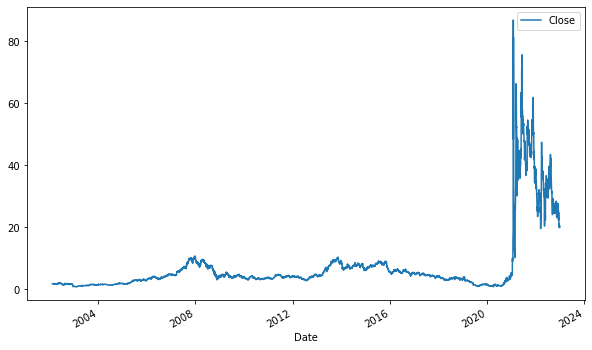

In [20]:
# We plot the column 'Close' of the dataframe stock_tesla in  terms of the column 'Date'.
stock_gmstop.plot(x='Date', y='Close', kind='line', figsize=(10, 6))

/var/folders/ym/n_qjv09s6t16h_rs33mqx4m00000gn/T/ipykernel_1692/2100123207.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gmstop_df['revenue'] = gmstop_df['revenue'].str.replace('$', '').str.replace(',', '.').astype(float)


<AxesSubplot:xlabel='date'>

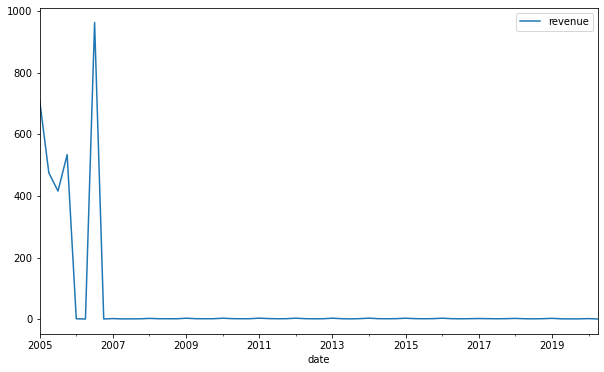

In [21]:
# Change the format of the column 'date' to datetime.
gmstop_df['date'] = pd.to_datetime(gmstop_df['date'])

# Change the format of the column 'revenue' to float.
gmstop_df['revenue'] = gmstop_df['revenue'].str.replace('$', '').str.replace(',', '.').astype(float)

# We plot the column 'Close' of the dataframe stock_tesla in  terms of the column 'Date'.
gmstop_df.plot(x='date', y='revenue', kind='line', figsize=(10, 6))